In [2]:
import pandas as pd
import json
from pandas import json_normalize
from IPython.display import display
import os

In [3]:
def resumetable(df):

    new_df = pd.DataFrame(columns = ["type","nb_na","nb_val","lign1","ligne2","ligne3"], index = df.columns)

    for col in df.columns:
        liste = []

        liste.append(df[col].dtype)
        liste.append(df[col].isna().sum())
        liste.append(df[col].unique().shape[0])
        liste.append(df[col].iloc[0])
        liste.append(df[col].iloc[1])
        liste.append(df[col].iloc[2])
        
        new_df.loc[col]= liste

    return new_df

In [4]:
directory = "./json_files"
liste_fichiers = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
print(liste_fichiers)

['observations_0.json', 'observations_1.json', 'observations_10.json', 'observations_11.json', 'observations_2.json', 'observations_3.json', 'observations_4.json', 'observations_5.json', 'observations_6.json', 'observations_7.json', 'observations_8.json', 'observations_9.json']


In [5]:
df2 = pd.DataFrame()

for fichier in liste_fichiers:
    with open("json_files/" + fichier, 'r') as j:
        info = json.loads(j.read())

    df2 = pd.concat([df2,json_normalize(info)])

print(df2.columns)
print(df2.shape)
display(df2.head(10))


Index(['observation', 'label', 'image_id', 'image_url', 'user', 'date',
       'thumbnail', 'location', 'gbif_info.kingdom', 'gbif_info.family',
       'gbif_info.speciesKey', 'gbif_info.rank', 'gbif_info.phylum',
       'gbif_info.orderKey', 'gbif_info.species', 'gbif_info.confidence',
       'gbif_info.classKey', 'gbif_info.matchType', 'gbif_info.familyKey',
       'gbif_info.status', 'gbif_info.usageKey', 'gbif_info.kingdomKey',
       'gbif_info.genusKey', 'gbif_info.canonicalName', 'gbif_info.phylumKey',
       'gbif_info.class', 'gbif_info.synonym', 'gbif_info.scientificName',
       'gbif_info.genus', 'gbif_info.order', 'gbif_info.note', 'gbif_info'],
      dtype='object')
(650743, 32)


,observation,label,image_id,image_url,user,date,thumbnail,location,gbif_info.kingdom,gbif_info.family,...,gbif_info.genusKey,gbif_info.canonicalName,gbif_info.phylumKey,gbif_info.class,gbif_info.synonym,gbif_info.scientificName,gbif_info.genus,gbif_info.order,gbif_info.note,gbif_info
0,1,Xylaria polymorpha,1,http://mushroomobserver.org/images/320/1,1,2006-05-21 07:17:05,1,214,Fungi,Xylariaceae,...,2568748.0,Xylaria polymorpha,95.0,Sordariomycetes,False,"Xylaria polymorpha (Pers.) Grev., 1824",Xylaria,Xylariales,NaN,NaN
1,2,Xylaria magnoliae,2,http://mushroomobserver.org/images/320/2,1,2006-05-21 07:17:06,1,53,Fungi,Xylariaceae,...,2568748.0,Xylaria magnoliae,95.0,Sordariomycetes,False,"Xylaria magnoliae J.D. Rogers, 1979",Xylaria,Xylariales,NaN,NaN
2,3,Xylaria hypoxylon,3,http://mushroomobserver.org/images/320/3,1,2006-05-21 07:17:08,1,60,Fungi,Xylariaceae,...,2568748.0,Xylaria hypoxylon,95.0,Sordariomycetes,False,"Xylaria hypoxylon (L.) Grev., 1824",Xylaria,Xylariales,NaN,NaN
3,4,Xylaria hypoxylon,4,http://mushroomobserver.org/images/320/4,1,2006-05-21 07:17:10,1,5,Fungi,Xylariaceae,...,2568748.0,Xylaria hypoxylon,95.0,Sordariomycetes,False,"Xylaria hypoxylon (L.) Grev., 1824",Xylaria,Xylariales,NaN,NaN
4,5,Xeromphalina,5,http://mushroomobserver.org/images/320/5,1,2006-05-21 07:17:12,1,36,Fungi,Mycenaceae,...,2527268.0,Xeromphalina,34.0,Agaricomycetes,False,Xeromphalina Kühner & Maire,Xeromphalina,Agaricales,NaN,NaN
5,6,Xeromphalina campanella,6,http://mushroomobserver.org/images/320/6,1,2006-05-21 07:17:13,1,58,Fungi,Mycenaceae,...,2527268.0,Xeromphalina campanella,34.0,Agaricomycetes,False,Xeromphalina campanella (Batsch) Kühner & Mair...,Xeromphalina,Agaricales,NaN,NaN
6,7,Xerocomellus zelleri,7,http://mushroomobserver.org/images/320/7,1,2006-05-21 07:17:14,1,58,Fungi,Boletaceae,...,8184844.0,Xerocomellus zelleri,34.0,Agaricomycetes,False,"Xerocomellus zelleri (Murrill) Klofac, 2011",Xerocomellus,Boletales,NaN,NaN
7,8,Xerocomellus zelleri,8,http://mushroomobserver.org/images/320/8,1,2006-05-21 07:17:15,1,39,Fungi,Boletaceae,...,8184844.0,Xerocomellus zelleri,34.0,Agaricomycetes,False,"Xerocomellus zelleri (Murrill) Klofac, 2011",Xerocomellus,Boletales,NaN,NaN
8,9,Xerocomus subtomentosus,9,http://mushroomobserver.org/images/320/9,1,2006-05-21 07:17:17,1,69,Fungi,Boletaceae,...,2519224.0,Xerocomus subtomentosus,34.0,Agaricomycetes,False,Xerocomus subtomentosus,Xerocomus,Boletales,NaN,NaN
9,9,Xerocomus subtomentosus,10,http://mushroomobserver.org/images/320/10,1,2006-05-21 07:17:17,0,69,Fungi,Boletaceae,...,2519224.0,Xerocomus subtomentosus,34.0,Agaricomycetes,False,Xerocomus subtomentosus,Xerocomus,Boletales,NaN,NaN


In [6]:
new_cols = {}
for col in df2.columns:
    new_cols[col] = col.replace('gbif_info.','')
print(new_cols)

{'observation': 'observation', 'label': 'label', 'image_id': 'image_id', 'image_url': 'image_url', 'user': 'user', 'date': 'date', 'thumbnail': 'thumbnail', 'location': 'location', 'gbif_info.kingdom': 'kingdom', 'gbif_info.family': 'family', 'gbif_info.speciesKey': 'speciesKey', 'gbif_info.rank': 'rank', 'gbif_info.phylum': 'phylum', 'gbif_info.orderKey': 'orderKey', 'gbif_info.species': 'species', 'gbif_info.confidence': 'confidence', 'gbif_info.classKey': 'classKey', 'gbif_info.matchType': 'matchType', 'gbif_info.familyKey': 'familyKey', 'gbif_info.status': 'status', 'gbif_info.usageKey': 'usageKey', 'gbif_info.kingdomKey': 'kingdomKey', 'gbif_info.genusKey': 'genusKey', 'gbif_info.canonicalName': 'canonicalName', 'gbif_info.phylumKey': 'phylumKey', 'gbif_info.class': 'class', 'gbif_info.synonym': 'synonym', 'gbif_info.scientificName': 'scientificName', 'gbif_info.genus': 'genus', 'gbif_info.order': 'order', 'gbif_info.note': 'note', 'gbif_info': 'gbif_info'}


In [21]:
new_df = df2.rename(columns=new_cols)
new_df = new_df[new_df['thumbnail']==1]
new_df.columns

Index(['observation', 'label', 'image_id', 'image_url', 'user', 'date',
       'thumbnail', 'location', 'kingdom', 'family', 'speciesKey', 'rank',
       'phylum', 'orderKey', 'species', 'confidence', 'classKey', 'matchType',
       'familyKey', 'status', 'usageKey', 'kingdomKey', 'genusKey',
       'canonicalName', 'phylumKey', 'class', 'synonym', 'scientificName',
       'genus', 'order', 'note', 'gbif_info'],
      dtype='object')

In [22]:
display(resumetable(new_df))
display(new_df.describe())

,type,nb_na,nb_val,lign1,ligne2,ligne3
observation,object,0,218259,1,2,3
label,object,0,12013,Xylaria polymorpha,Xylaria magnoliae,Xylaria hypoxylon
image_id,object,0,217977,1,2,3
image_url,object,0,217969,http://mushroomobserver.org/images/320/1,http://mushroomobserver.org/images/320/2,http://mushroomobserver.org/images/320/3
user,object,0,3637,1,1,1
date,object,0,208477,2006-05-21 07:17:05,2006-05-21 07:17:06,2006-05-21 07:17:08
thumbnail,int64,0,1,1,1,1
location,object,13,14324,214,53,60
kingdom,object,11276,8,Fungi,Fungi,Fungi
family,object,21931,457,Xylariaceae,Xylariaceae,Xylariaceae


,thumbnail,speciesKey,orderKey,confidence,classKey,familyKey,usageKey,kingdomKey,genusKey,phylumKey,gbif_info
count,218262.0,1.388230e+05,2.040020e+05,218215.000000,2.047410e+05,1.963310e+05,2.069950e+05,206986.000000,1.934500e+05,2.056080e+05,0.0
mean,1.0,4.501330e+06,2.922860e+04,96.723983,1.287443e+04,1.410750e+05,3.889303e+06,5.012783,3.584471e+06,1.091782e+04,NaN
std,0.0,2.067711e+06,4.489083e+05,2.188141,3.069333e+05,7.785914e+05,2.221266e+06,0.399846,2.075097e+06,2.893861e+05,NaN
min,1.0,1.309692e+06,3.720000e+02,84.000000,1.250000e+02,1.958000e+03,5.000000e+00,0.000000,1.309629e+06,9.000000e+00,NaN
25%,1.0,2.543322e+06,1.144000e+03,94.000000,1.860000e+02,4.172000e+03,2.527866e+06,5.000000,2.524961e+06,3.400000e+01,NaN
50%,1.0,3.360287e+06,1.499000e+03,98.000000,1.860000e+02,4.186000e+03,2.593405e+06,5.000000,2.529999e+06,3.400000e+01,NaN
75%,1.0,5.455910e+06,1.499000e+03,98.000000,1.860000e+02,8.442000e+03,5.255104e+06,5.000000,2.601137e+06,3.400000e+01,NaN
max,1.0,8.708587e+06,8.285979e+06,100.000000,8.179345e+06,8.428462e+06,8.708587e+06,7.000000,8.703561e+06,8.158183e+06,NaN


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

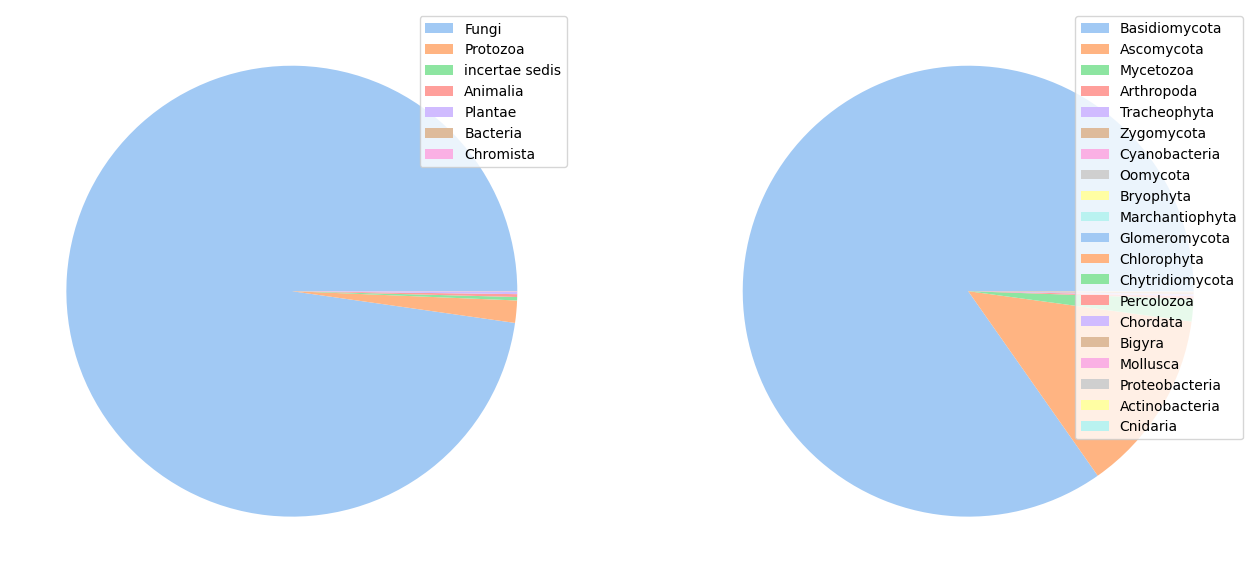

In [23]:
#par kingdom, phylum
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8))

colors = sns.color_palette("pastel")
ax1.pie(pd.DataFrame(new_df['kingdom'].value_counts()).reset_index()['count'], colors=colors);
ax1.legend(pd.DataFrame(new_df['kingdom'].value_counts()).reset_index()['kingdom'], loc="upper right")

colors = sns.color_palette("pastel")
ax2.pie(pd.DataFrame(new_df['phylum'].value_counts()).reset_index()['count'], colors=colors);
ax2.legend(pd.DataFrame(new_df['phylum'].value_counts()).reset_index()['phylum'], loc="upper right")

#pour chaque il y a une valeur qui ressort particulièrement


In [24]:
#par class (trop de valeurs pour un camembert)
class_counts = new_df['class'].value_counts()
class_percentages = (class_counts / class_counts.sum() * 100).round(2)
class_counts_df = pd.DataFrame({'Count': class_counts.values}, index=class_counts.index)
class_counts_df['Percentage'] = class_percentages.values
display(class_counts_df.T)

class,Agaricomycetes,Lecanoromycetes,Pezizomycetes,Sordariomycetes,Myxomycetes,Leotiomycetes,Dacrymycetes,Tremellomycetes,Eurotiomycetes,Arthoniomycetes,...,Gastropoda,Gammaproteobacteria,Polypodiopsida,Equisetopsida,Malasseziomycetes,Dictyosteliomycetes,Trebouxiophyceae,Bryopsida,Jungermanniopsida,Hydrozoa
Count,172008.00,11379.00,6519.00,5035.00,2641.00,2105.00,1032.0,703.00,444.00,376.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Percentage,84.01,5.56,3.18,2.46,1.29,1.03,0.5,0.34,0.22,0.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


KeyboardInterrupt: 

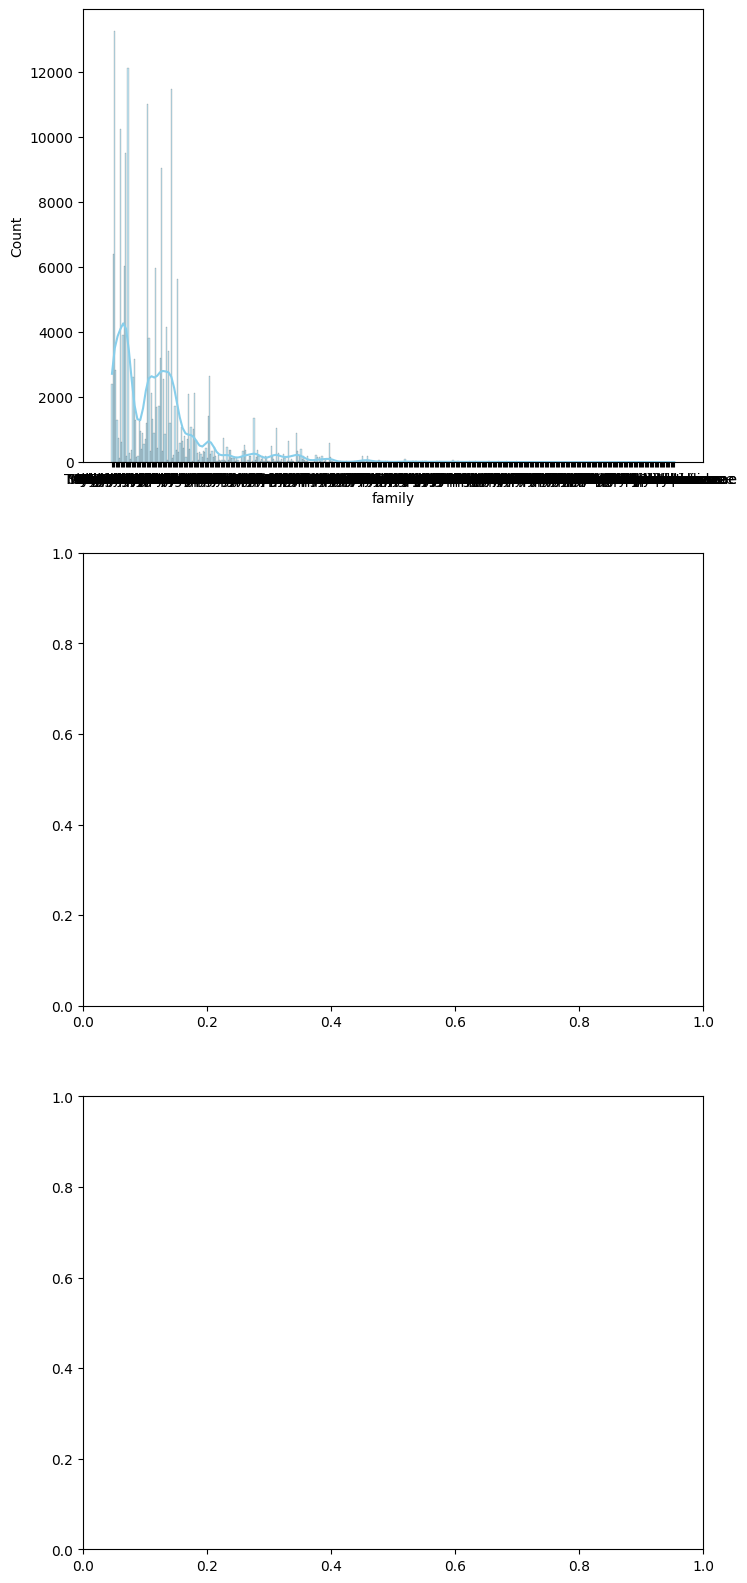

In [25]:
#par family, genus, species
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(8,20))

sns.histplot(new_df['family'], ax=ax1, color='skyblue', kde=True);
sns.histplot(new_df['genus'], ax=ax2, color='salmon', kde=True);
sns.histplot(new_df['species'], ax=ax3, color='green', kde=True);

ax1.set_title('Distribution des familles')
ax2.set_title('Distribution des genres')
ax3.set_title('Distribution des espèces')

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_22212\1278000294.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_22212\1278000294.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_22212\1278000294.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


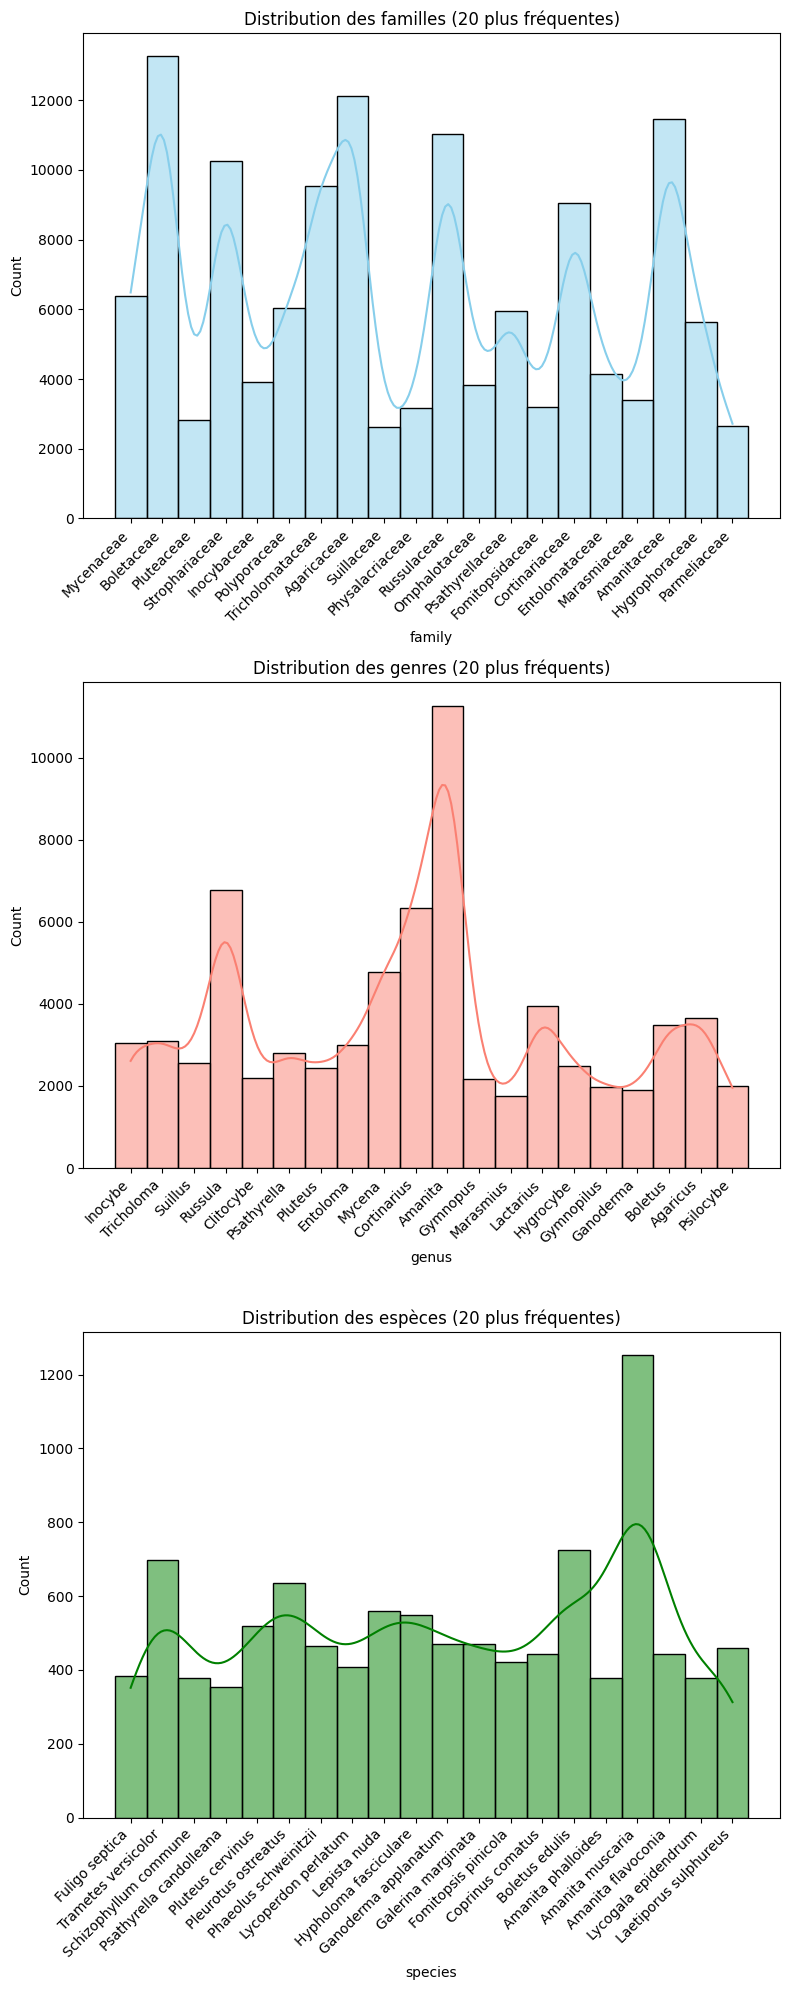

In [26]:
########Affichage des 20 meilleurs##############
# Triez les données selon les comptages
family_counts = new_df['family'].value_counts().nlargest(20)
genus_counts = new_df['genus'].value_counts().nlargest(20)
species_counts = new_df['species'].value_counts().nlargest(20)

# Créez une figure avec trois sous-graphiques
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 20))

# Tracer les histplots avec les données triées
sns.histplot(new_df[new_df['family'].isin(family_counts.index)], x='family', ax=ax1, color='skyblue', kde=True);
sns.histplot(new_df[new_df['genus'].isin(genus_counts.index)], x='genus', ax=ax2, color='salmon', kde=True);
sns.histplot(new_df[new_df['species'].isin(species_counts.index)], x='species', ax=ax3, color='green', kde=True);

# Définir les titres des graphiques
ax1.set_title('Distribution des familles (20 plus fréquentes)')
ax2.set_title('Distribution des genres (20 plus fréquents)')
ax3.set_title('Distribution des espèces (20 plus fréquentes)')

# Tourner les labels des valeurs sur l'axe x
for ax in [ax1, ax2, ax3]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_22212\2195395821.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_22212\2195395821.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_22212\2195395821.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


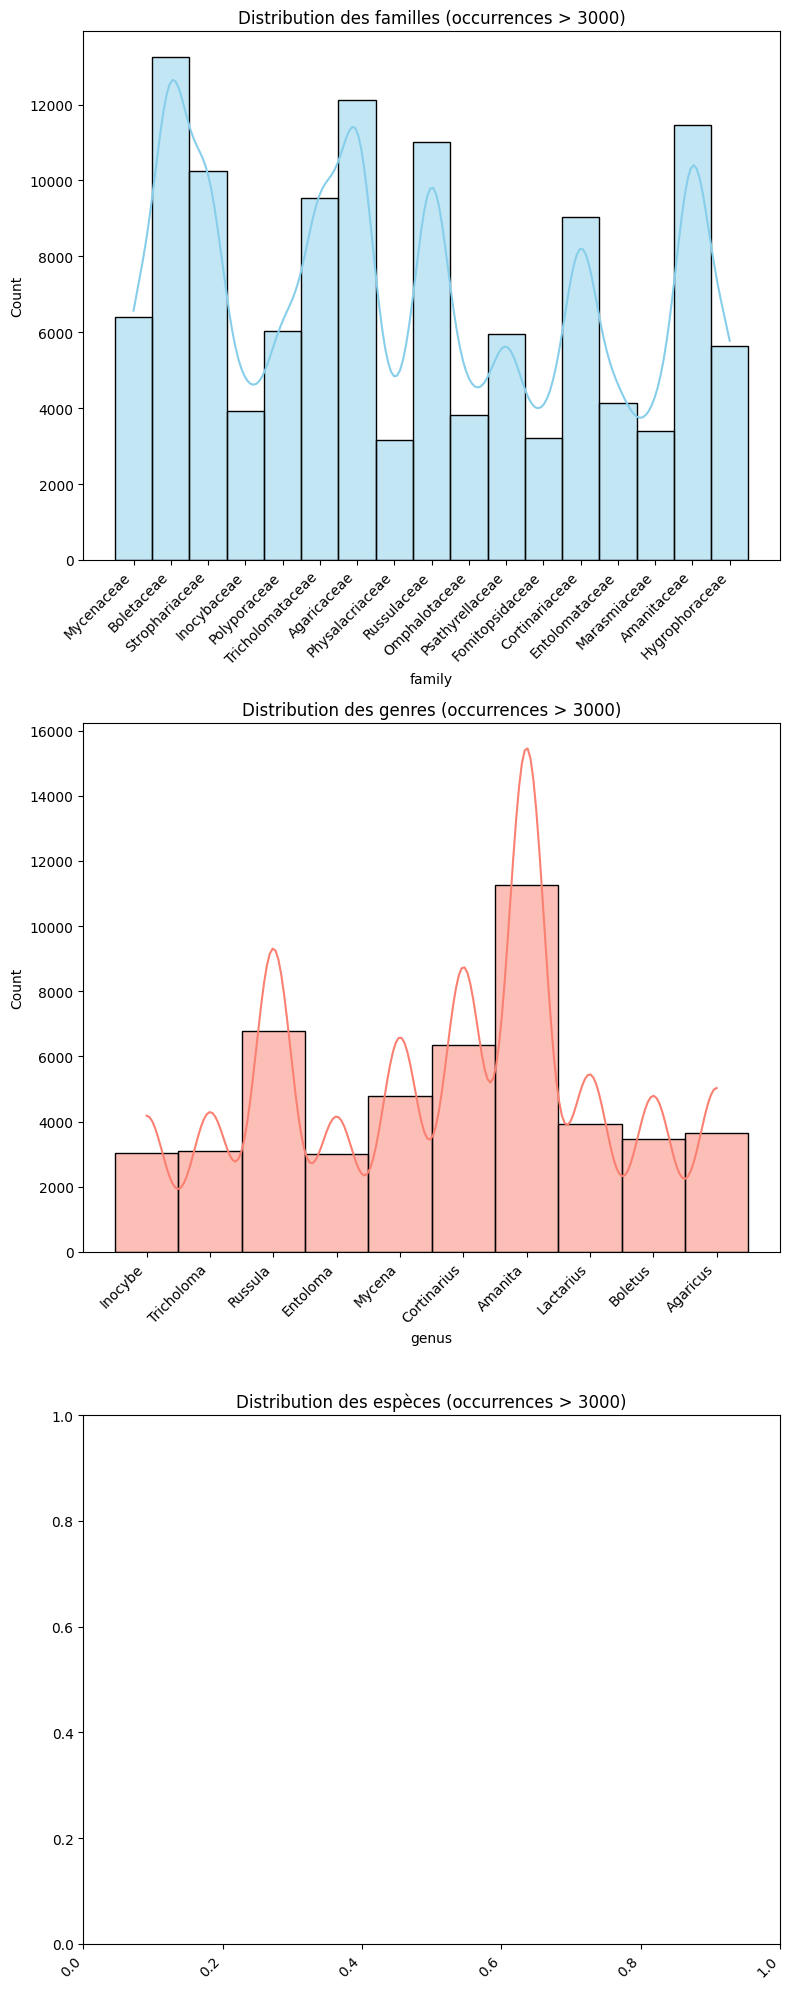

In [27]:
############Affichage des +3000 occurrences#############
# Filtrer les données pour inclure uniquement les labels avec plus de 3000 occurrences
filtered_family = new_df['family'].value_counts()[new_df['family'].value_counts() > 3000].index
filtered_genus = new_df['genus'].value_counts()[new_df['genus'].value_counts() > 3000].index
filtered_species = new_df['species'].value_counts()[new_df['species'].value_counts() > 3000].index

# Créer un sous-ensemble de données contenant uniquement ces labels filtrés
filtered_df_family = new_df[new_df['family'].isin(filtered_family)]
filtered_df_genus = new_df[new_df['genus'].isin(filtered_genus)]
filtered_df_species = new_df[new_df['species'].isin(filtered_species)]

# Créer la figure et les sous-graphiques
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 20))

# Tracer les histogrammes avec les données filtrées
sns.histplot(filtered_df_family['family'], ax=ax1, color='skyblue', kde=True);
sns.histplot(filtered_df_genus['genus'], ax=ax2, color='salmon', kde=True);
sns.histplot(filtered_df_species['species'], ax=ax3, color='green', kde=True);

# Définir les titres des sous-graphiques
ax1.set_title('Distribution des familles (occurrences > 3000)')
ax2.set_title('Distribution des genres (occurrences > 3000)')
ax3.set_title('Distribution des espèces (occurrences > 3000)')

# Tourner les labels des valeurs sur l'axe x
for ax in [ax1, ax2, ax3]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

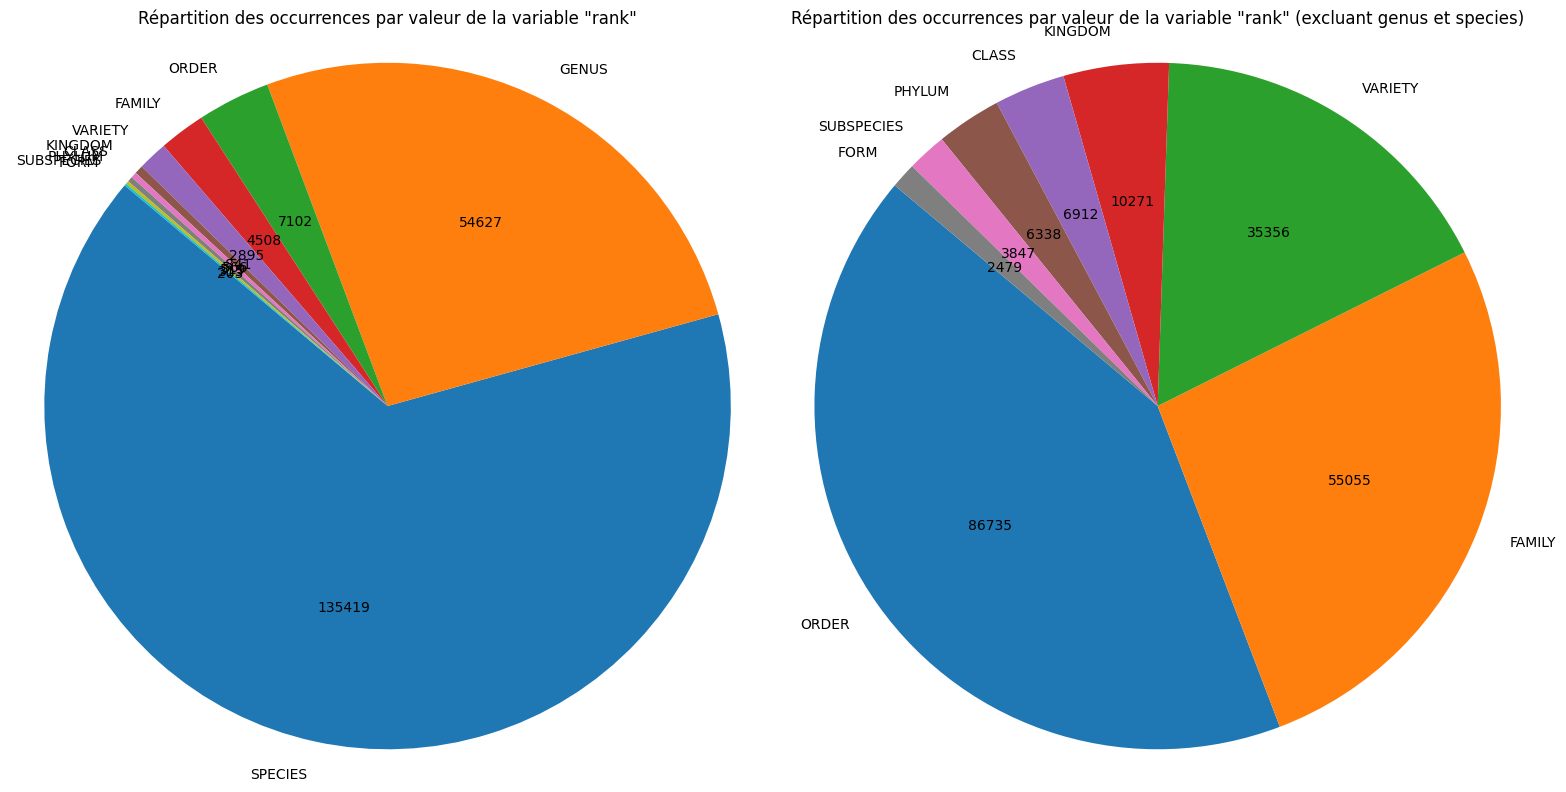

In [28]:
# Fonction pour formatter le texte à afficher sur les tranches du camembert
def formatter(pct):
    total = sum(occurrences_all)
    val = int(round(pct*total/100.0))
    return '{:d}'.format(val)

# Créer la figure et les sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Premier camembert : toutes les valeurs de 'rank'
occurrences_all = new_df['rank'].value_counts()
ax1.pie(occurrences_all, labels=occurrences_all.index, autopct=formatter, startangle=140)
ax1.set_title('Répartition des occurrences par valeur de la variable "rank"')

# Deuxième camembert : valeurs de 'rank' excluant 'genus' et 'species'
filtered_df = new_df[(new_df['rank'] != 'GENUS') & (new_df['rank'] != 'SPECIES')]
occurrences_filtered = filtered_df['rank'].value_counts()
ax2.pie(occurrences_filtered, labels=occurrences_filtered.index, autopct=formatter, startangle=140)
ax2.set_title('Répartition des occurrences par valeur de la variable "rank" (excluant genus et species)')

# Assure que les camemberts sont circulaires
ax1.axis('equal')
ax2.axis('equal')

# Afficher les graphiques
plt.tight_layout()
plt.show()

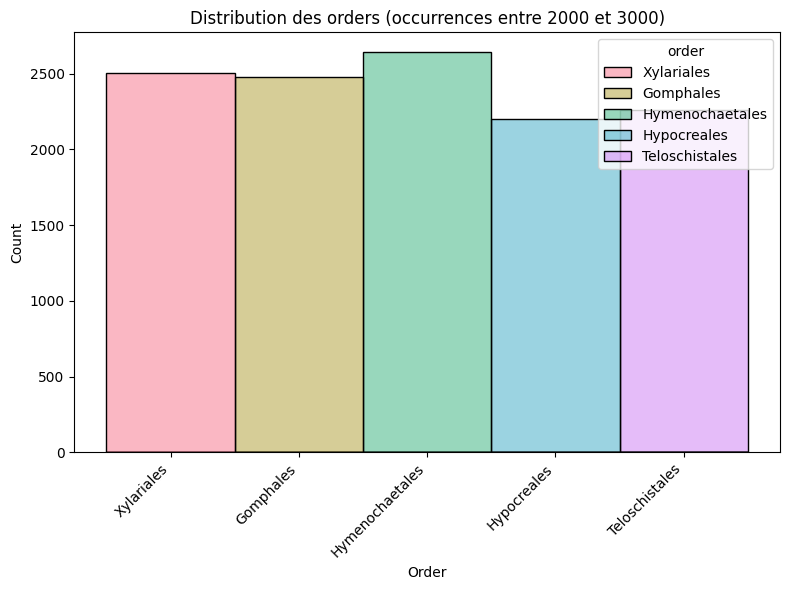

In [30]:
############Affichage odrder avec entre 2000 et 3000 occurences############
# Filtrer les données pour inclure uniquement les labels avec 2000 à 3000 occurrences
filtered_order = new_df['order'].value_counts()[(new_df['order'].value_counts() <= 3000) & (new_df['order'].value_counts() >= 2000)].index
 
# Créer un sous-ensemble de données contenant uniquement ces labels filtrés
filtered_df_order = new_df[new_df['order'].isin(filtered_order)]
 
# Créer la figure et les sous-graphiques
plt.figure(figsize=(8, 6))
 
# Tracer les histogrammes avec les données filtrées
sns.histplot(filtered_df_order, x = 'order', kde=True,
             palette = sns.color_palette("husl", len(filtered_order)),
             hue = 'order')
 
# Définir les titres des sous-graphiques
plt.title('Distribution des orders (occurrences entre 2000 et 3000)')
plt.xlabel('Order')
plt.ylabel('Count')
 
plt.xticks(rotation=45, ha='right')
 
plt.tight_layout()
plt.show()

In [33]:
##############Dataset qui ne garde que les variables qui nous interesse#################

#Sélection des orders entre 2000 et 3000
order_range = new_df[new_df['order'].isin(['Xylariales','Gomphales','Hymenochaetales','Hypocreales','Teloschistales'])]

#Filtre sur les variables
order_df = order_range[['image_id','image_url','date','order']]

#Nombre de lignes total
order_df.shape[0]

#Nombre de lignes pour thumbnail = 0 ou = 1
order_df['thumbnail'].value_counts()

KeyError: 'thumbnail'

In [32]:
order_df

,image_id,image_url,date,order
0,1,http://mushroomobserver.org/images/320/1,2006-05-21 07:17:05,Xylariales
1,2,http://mushroomobserver.org/images/320/2,2006-05-21 07:17:06,Xylariales
2,3,http://mushroomobserver.org/images/320/3,2006-05-21 07:17:08,Xylariales
3,4,http://mushroomobserver.org/images/320/4,2006-05-21 07:17:10,Xylariales
130,131,http://mushroomobserver.org/images/320/131,2006-05-21 07:20:10,Gomphales
...,...,...,...,...
68103,672696,http://mushroomobserver.org/images/320/672696,2016-10-11 17:55:48,Hypocreales
68113,672699,http://mushroomobserver.org/images/320/672699,2016-10-11 18:07:53,Hymenochaetales
68280,672879,http://mushroomobserver.org/images/320/672879,2016-10-11 20:34:12,Hypocreales
68289,672886,http://mushroomobserver.org/images/320/672886,2016-10-11 20:59:23,Hymenochaetales
